In [2]:
%reload_ext autoreload
%autoreload 2
from importlib import reload

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

from zcode.constants import *
import zcode.math as zmath
import zcode.plot as zplot
import zcode.inout as zio

import evolve_lzk

/Users/lzkelley/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/lzkelley/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
np.seterr(divide='ignore', invalid='ignore');

mpl.rc('font', **{'family': 'serif', 'sans-serif': ['Times']})
mpl.rc('lines', solid_capstyle='round')
mpl.rc('mathtext', fontset='cm')
plt.rcParams.update({'grid.alpha': 0.5})

### Check Density Profiles

In [3]:
PATH_INPUT_DATA = ("/Users/lzkelley/Research/working/arepo/illustris/redesign/mike_katz/illustris_LISA_paper/data/"
                   "density_profiles.txt")

# np.loadtxt(PATH_INPUT_DATA, dtype={names: []})
data = np.genfromtxt(PATH_INPUT_DATA, names=True)
print("Shape = ", data.shape, " Names = ", data.dtype.names)

Shape =  (17535,)  Names =  ('m', 'which', 'snap', 'sub', 'star_norm', 'star_gamma', 'gas_norm', 'gas_gamma', 'dm_norm', 'dm_gamma')


test =  9491


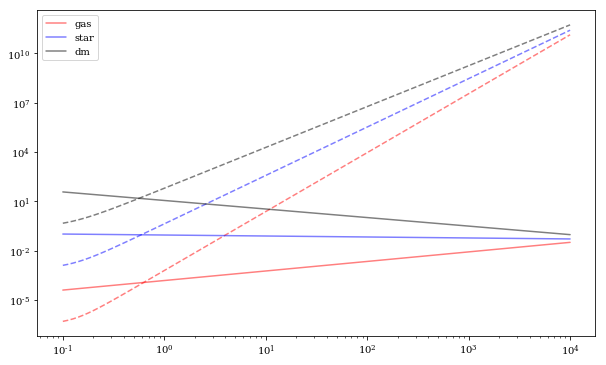

In [4]:
names = ['gas', 'star', 'dm']
colors = ['red', 'blue', 'k']
fig, ax = plt.subplots(figsize=[10, 6])
ax.set(xscale='log', yscale='log')

xx = np.logspace(-1, 4, 100)
dx = np.append(xx[0], np.diff(xx))

num_gals = data.size
test = np.random.choice(num_gals)
print("test = ", test)

for ii, (nn, cc) in enumerate(zip(names, colors)):
    alpha = data[nn + '_norm'][test]
    gamma = data[nn + '_gamma'][test]
    yy = alpha*np.power(xx, -gamma)
    ax.plot(xx, yy, color=cc, label=nn, alpha=0.5)
    ax.plot(xx, np.cumsum(4*np.pi*xx**2*yy*dx), color=cc, ls='--', alpha=0.5)

plt.legend()
plt.show()

# Evolution

In [ ]:
# PATH_INPUT_DATA = ("/Users/lzkelley/Research/working/arepo/illustris/redesign/mike_katz/illustris_LISA_paper/code/"
#                    "simulation_input_data.txt")
PATH_INPUT_DATA = ("/Users/lzkelley/Research/working/arepo/illustris/redesign/mike_katz/illustris_LISA_paper/data/"
                   "simulation_input_data.txt")
#                    "test_input_data.txt")

evolver = evolve_lzk.EvolveLZK(PATH_INPUT_DATA, verbose=True)

input_data.shape = (17535,)
names = merger, snap_prev_in, snapshot_prev_out, snapshot_fin_out, subhalo_prev_in, subhalo_prev_out, subhalo_fin_out, id_old_prev_in, id_old_prev_out, id_old_fin_out, id_new_prev_in, id_new_prev_out, id_new_fin_out, mdot_sum, mass_new_prev_in, mass_new_prev_out, mass_new_fin_out, redshift, separation, coordinates_x, coordinates_y, coordinates_z, star_norm, star_gamma, gas_norm, gas_gamma, dm_norm, dm_gamma, vel_disp_prev_in, vel_disp_prev_out, vel_disp_fin_out, stellar_mass_prev_in, stellar_mass_prev_out, stellar_mass_fin_out, total_mass_prev_in, total_mass_prev_out, total_mass_fin_out
_dens_prof_norms.shape =  (3, 17535)
Mtot = (38.76, 39.86, 40.72, 42.02, 43.61), for (0%, 16%, 50%, 84%, 100%) (log values)
Mrat = (7.02e-06, 3.13e-03, 9.80e-02, 5.46e-01, 1.00e+00), for (0%, 16%, 50%, 84%, 100%)
redz_form = (1.11e-04, 4.47e-01, 1.23e+00, 2.44e+00, 7.67e+00), for (0%, 16%, 50%, 84%, 100%)
sepa = (5.87e+20, 4.87e+21, 6.68e+21, 9.80e+21, 4.49e+23), for (0%, 16%

/Users/lzkelley/Research/working/arepo/illustris/redesign/mike_katz/illustris_LISA_paper/code/evolve_lzk/evolveLZK.py:120: UserWarning: CHECK UNITS OF MDOT
  warnings.warn("CHECK UNITS OF MDOT")
/Users/lzkelley/Research/working/arepo/illustris/redesign/mike_katz/illustris_LISA_paper/code/evolve_lzk/evolveLZK.py:173: UserWarning: FIX TEMPORARY MASS PROFILES!
  warnings.warn("FIX TEMPORARY MASS PROFILES!")


Setting `dens_gas`, `mass_gas`
Setting `dens_star`, `mass_star`
Running `EvolveLZK.calc_critical_radii()


/Users/lzkelley/Research/working/arepo/illustris/redesign/mike_katz/illustris_LISA_paper/code/evolve_lzk/evolveLZK.py:194: UserWarning: Using fixed velocity dispersion!
  warnings.warn("Using fixed velocity dispersion!")


In [ ]:
evolver.integrate()

In [ ]:
evolver.calculate_timescale()

In [ ]:
reload(zplot)

In [ ]:
NBINS = 14

mrat = evolver.mrat
mtot = evolver.mtot
coal = evolver.inds_coal
durs = evolver.durs

bins_mrat = zmath.spacing(mrat, num=NBINS)
bins_mtot = zmath.spacing(mtot, num=NBINS)

hist, _, _, _ = sp.stats.binned_statistic_2d(
    mrat, mtot, durs, statistic='median', bins=[bins_mrat, bins_mtot])

count, _, _, _ = sp.stats.binned_statistic_2d(
    mrat, mtot, durs, statistic='count', bins=[bins_mrat, bins_mtot])

count_coal, _, _, _ = sp.stats.binned_statistic_2d(
    mrat[coal], mtot[coal], durs[coal], statistic='count', bins=[bins_mrat, bins_mtot])

hist /= GYR
bins_mtot /= MSOL
coal_frac = count_coal / count
# print(hist)
print(zmath.stats_str(hist[hist > 0.0]))

hist[count == 0] = np.inf
coal_frac[count == 0] = 0.0

smap_count = zplot.colormap([1, count.max()], scale='linear', cmap='gnuplot2')
smap_life = zplot.colormap([1e-2, 1e2], scale='log', cmap='gnuplot2_r')
smap_coal = zplot.colormap([0.01, 1.0], scale='linear', cmap='gnuplot2')

fig, axes = plt.subplots(figsize=[17, 6], ncols=3)
plt.subplots_adjust(left=0.05, bottom=0.08, top=0.86, right=0.98, wspace=0.16)
cbaxes = []
for ax in axes:
    bbox = zplot.extent(ax, invert=fig.transFigure)
    ax.set(xscale='log', yscale='log')
    cbax = fig.add_axes([bbox.x0, bbox.y1 + 0.07, bbox.width, 0.03])
    cbaxes.append(cbax)
    
cbkw = dict(cbar_kwargs=dict(orientation='horizontal'))
    
labels = ['Mass Ratio', 'Total Mass [Msol]', 'Count']
zplot.plot2DHist(axes[0], bins_mrat, bins_mtot, count, labels=labels,
                 smap=smap_count, overlay=count, overlay_fmt=".0f", cbax=cbaxes[0], **cbkw)

labels[2] = 'Median Lifetime [Gyr]'
zplot.plot2DHist(axes[1], bins_mrat, bins_mtot, hist, labels=labels,
                 smap=smap_life, overlay=hist, overlay_fmt=".1f", cbax=cbaxes[1], **cbkw)

labels[2] = 'Coalescing Fraction'
zplot.plot2DHist(axes[2], bins_mrat, bins_mtot, coal_frac, labels=labels,
                 smap=smap_coal, overlay=coal_frac, overlay_fmt=".2f", cbax=cbaxes[2], **cbkw)


fig.savefig("test.pdf", transparent=True)